In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [70]:
data = pd.read_csv("./Loan Approval Prediction Dataset/credit_risk_dataset.csv")

In [71]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [72]:
encoder = OneHotEncoder(sparse_output=False, drop=None)
columns_to_encode = ['person_home_ownership', 'loan_intent']
encoded_data = encoder.fit_transform(data[columns_to_encode])
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))
df = pd.concat([data, df_encoded], axis=1)
df.drop(columns=columns_to_encode, inplace=True)
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,D,35000,16.02,1,0.59,Y,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21,9600,5.0,B,1000,11.14,0,0.10,N,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25,9600,1.0,C,5500,12.87,1,0.57,N,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23,65500,4.0,C,35000,15.23,1,0.53,N,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24,54400,8.0,C,35000,14.27,1,0.55,Y,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [73]:
ordinal_encoder = LabelEncoder()
df['loan_grade_encoded'] = ordinal_encoder.fit_transform(data['loan_grade'])
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y':1, 'N':0})
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_encoded
0,22,59000,123.0,D,35000,16.02,1,0.59,1,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3
1,21,9600,5.0,B,1000,11.14,0,0.10,0,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,25,9600,1.0,C,5500,12.87,1,0.57,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,23,65500,4.0,C,35000,15.23,1,0.53,0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,24,54400,8.0,C,35000,14.27,1,0.55,1,4,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2


In [74]:
df.drop(columns=['loan_grade'], inplace=True)

In [75]:
X = df.drop('loan_status', axis=1)
Y = df['loan_status']

C:\Users\hoang\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


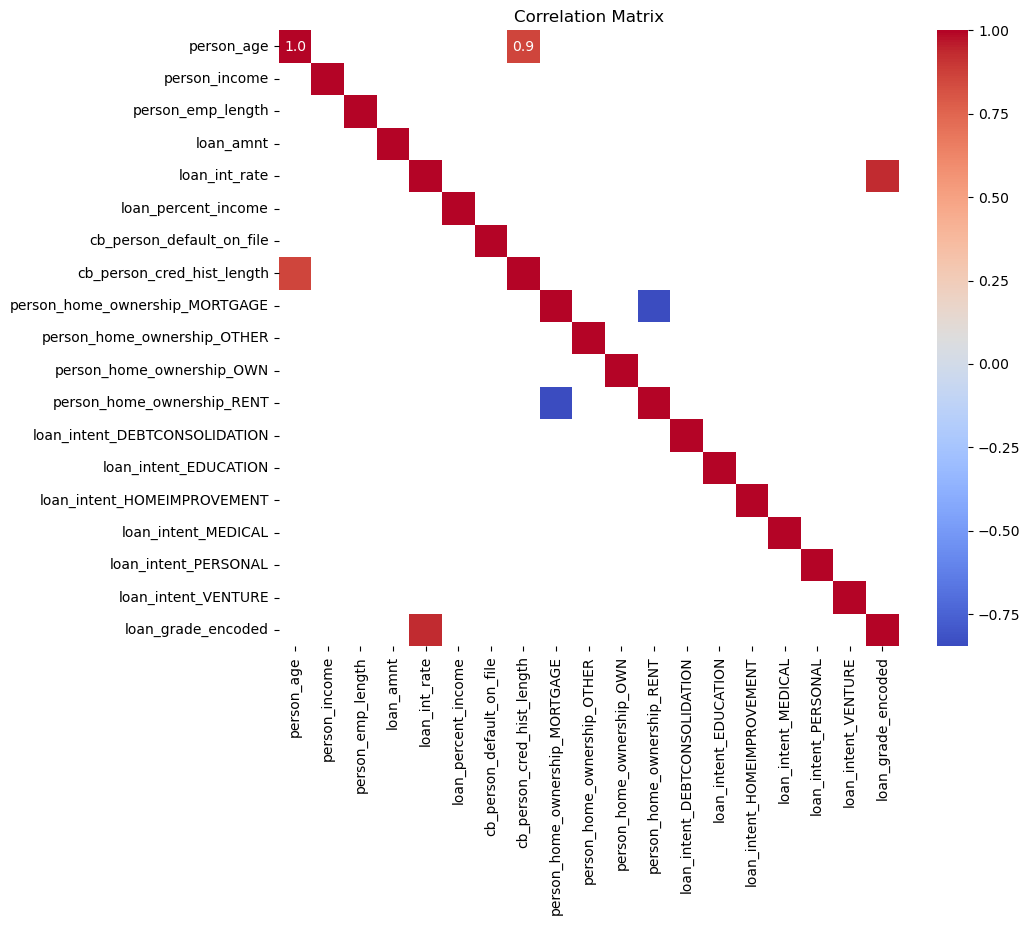

In [76]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(X)
X_standardized = pd.DataFrame(df_standardized, columns=X.columns)
corr_matrix = X_standardized.corr()

plt.figure(figsize=(10,8))
mask = np.abs(corr_matrix) < 0.75
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [77]:
numerical_columns = ['person_age', 'person_income',
                   'person_emp_length', 'loan_amnt','loan_int_rate', 
                     'loan_percent_income', 'cb_person_cred_hist_length']

C:\Users\hoang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hoang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hoang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hoang\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

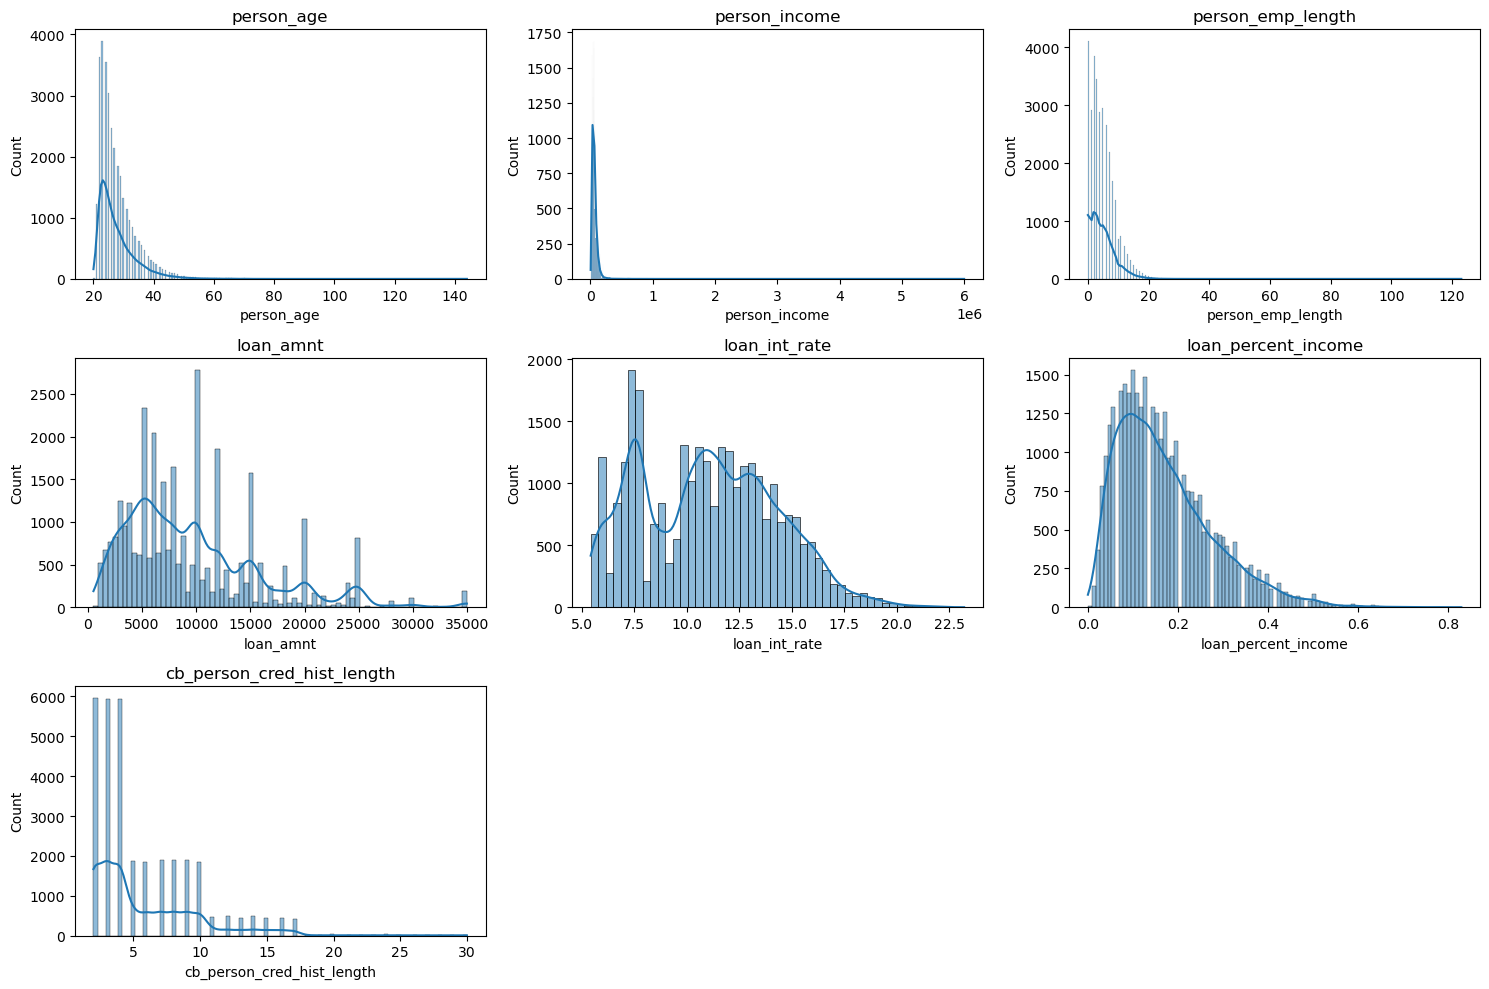

In [78]:

num_columns = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_columns//3) +1, ncols=3, figsize=(15,10))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], ax= axes[i], kde=True)
    axes[i].set_title(column)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [79]:
X_standardized.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_encoded
0,-0.903374,-0.114143,28.535538,4.019404,1.545580,3.931411,2.161294,-0.691554,-0.838161,-0.057402,-0.293499,0.990500,-0.436388,-0.496967,-0.352723,-0.478548,2.213885,-0.461414,1.527718
1,-1.060904,-0.911147,0.050769,-1.358650,0.039595,-0.657458,-0.462686,-0.938167,-0.838161,-0.057402,3.407161,-1.009591,-0.436388,2.012205,-0.352723,-0.478548,-0.451695,-0.461414,-0.187080
2,-0.430783,-0.911147,-0.914816,-0.646849,0.573479,3.744110,-0.462686,-0.691554,1.193089,-0.057402,-0.293499,-1.009591,-0.436388,-0.496967,-0.352723,2.089656,-0.451695,-0.461414,0.670319
3,-0.745843,-0.009274,-0.190627,4.019404,1.301784,3.369508,-0.462686,-0.938167,-0.838161,-0.057402,-0.293499,0.990500,-0.436388,-0.496967,-0.352723,2.089656,-0.451695,-0.461414,0.670319
4,-0.588313,-0.188358,0.774958,4.019404,1.005524,3.556809,2.161294,-0.444942,-0.838161,-0.057402,-0.293499,0.990500,-0.436388,-0.496967,-0.352723,2.089656,-0.451695,-0.461414,0.670319


In [80]:
from sklearn.decomposition import PCA 

#fill missing value with KNN
imputer = KNNImputer(n_neighbors=5, weights='uniform')
X_standardized[X_standardized.columns] = imputer.fit_transform(X_standardized[X_standardized.columns])

# Apply PCA
# pca = PCA(n_components=0.95)  # Keep 95% of the variance
# X_pca = pca.fit_transform(X_standardized)



# Split into train, test and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42, stratify=Y) # Pass X_pca if needed

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (26064, 14)
X_test shape: (6517, 14)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Random Forest Model:
Accuracy: 0.9093141015804819
Confusion Matrix:
[[4990  105]
 [ 486  936]]
ROC AUC: 0.8188097042272766
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5095
           1       0.90      0.66      0.76      1422

    accuracy                           0.91      6517
   macro avg       0.91      0.82      0.85      6517
weighted avg       0.91      0.91      0.90      6517



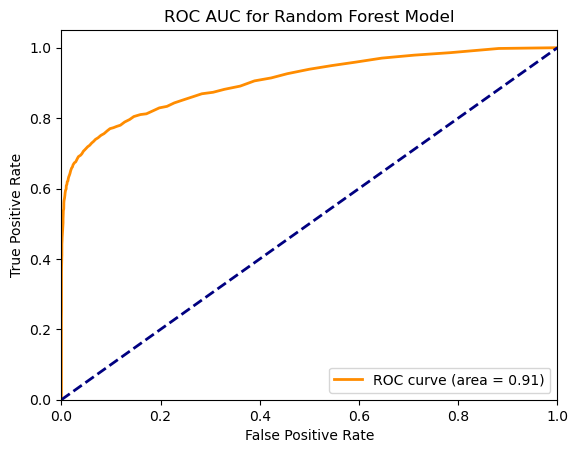

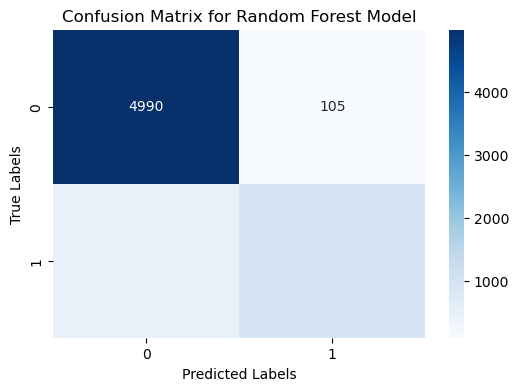


Decision Tree Model:
Accuracy: 0.8413380389749885
Confusion Matrix:
[[4535  560]
 [ 474  948]]
ROC AUC: 0.7783774942754333
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      5095
           1       0.63      0.67      0.65      1422

    accuracy                           0.84      6517
   macro avg       0.77      0.78      0.77      6517
weighted avg       0.84      0.84      0.84      6517



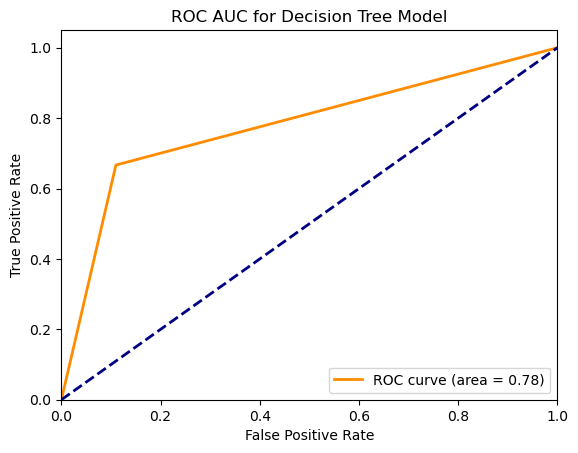

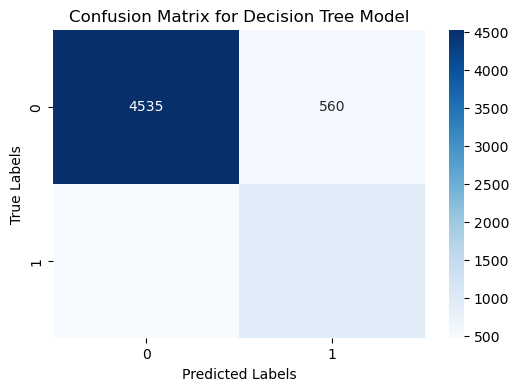


XGBoost Model:
Accuracy: 0.9062452048488568
Confusion Matrix:
[[4958  137]
 [ 474  948]]
ROC AUC: 0.8198887798495257
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5095
           1       0.87      0.67      0.76      1422

    accuracy                           0.91      6517
   macro avg       0.89      0.82      0.85      6517
weighted avg       0.90      0.91      0.90      6517



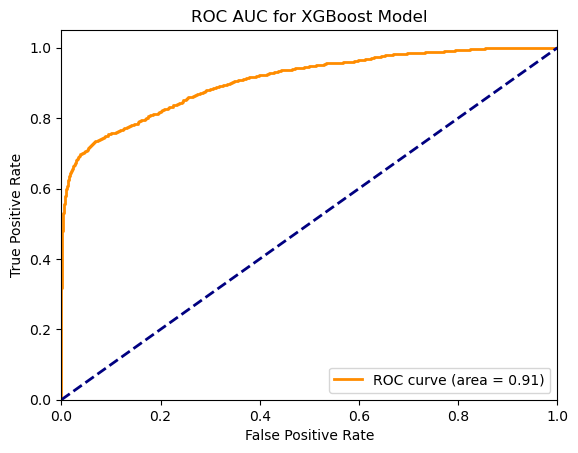

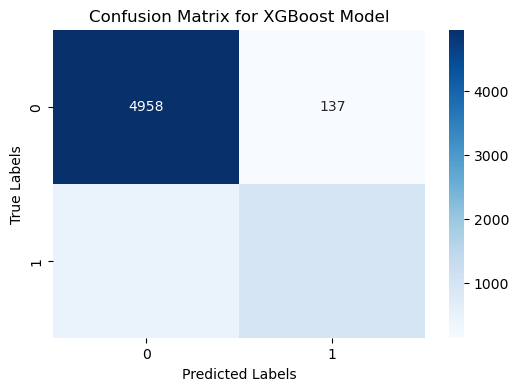


Bagging Classifier Model:
Accuracy: 0.9007211907319319
Confusion Matrix:
[[4964  131]
 [ 516  906]]
ROC AUC: 0.8057096599214089
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5095
           1       0.87      0.64      0.74      1422

    accuracy                           0.90      6517
   macro avg       0.89      0.81      0.84      6517
weighted avg       0.90      0.90      0.89      6517



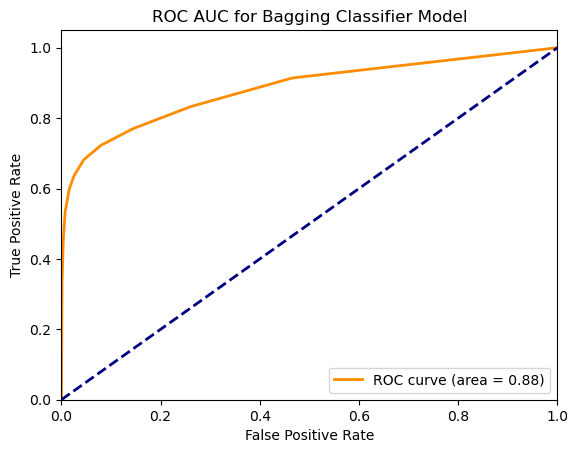

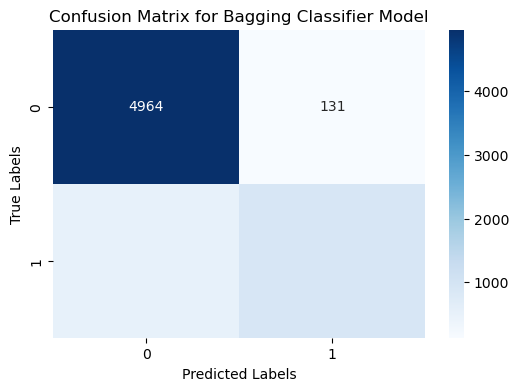

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
!pip install catboost --quiet
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


# Function to train and evaluate a model

def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)


  accuracy = accuracy_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)


  print(f"\n{model_name} Model:")
  print(f"Accuracy: {accuracy}")
  print(f"Confusion Matrix:\n{conf_matrix}")
  print(f"ROC AUC: {roc_auc}")
  print(f"Classification Report:\n{class_report}")



  # Visualize ROC AUC

  y_pred_proba = model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)



  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC AUC for {model_name} Model')
  plt.legend(loc="lower right")
  plt.show()



  # Visualize confusion matrix

  plt.figure(figsize=(6, 4))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.title(f'Confusion Matrix for {model_name} Model')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

  return accuracy, roc_auc

# Train and evaluate different models

models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(enable_categorical=True),
    "Bagging Classifier": BaggingClassifier()

}

results = {}

for model_name, model in models.items():

  accuracy, roc_auc = train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name)
  results[model_name] = {"accuracy": accuracy, "roc_auc": roc_auc}

In [ ]:


# Define models with their respective parameter grids for GridSearchCV
model_dict = {
    "RandomForestClassifier": (RandomForestClassifier(), {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 10, 20]}),
    "XGBClassifier": (XGBClassifier(), {'classifier__learning_rate': [0.1, 0.01], 'classifier__max_depth': [3, 5, 7]}),
    "KNeighborsClassifier": (KNeighborsClassifier(), {'classifier__n_neighbors': [3, 5, 7], 'classifier__weights': ['uniform', 'distance']}),
    "GaussianNB": (GaussianNB(), {}),
    "AdaBoostClassifier": (AdaBoostClassifier(), {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1.0]}),
    "GradientBoostingClassifier": (GradientBoostingClassifier(), {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1.0], 'classifier__max_depth': [3, 5]}),
}

# Perform GridSearchCV for each model with PCA
for model_name, (model, param_grid) in model_dict.items():
    print(f"Running GridSearchCV for {model_name} ...")

    # Create a pipeline 
    pipeline = Pipeline([
        ('classifier', model)
    ])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Print best parameters and best score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.2f}")

    # Evaluate on validation set with best model
    best_model = grid_search.best_estimator_

    # Predict on validation set
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    print(f"{model_name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{model_name} Classification report\n", classification_report(y_test, y_pred))
    print("---------------------------")

Running GridSearchCV for RandomForestClassifier ...
